### Visualize X-ray Spectral Maps from ClusterPyXT

1. Inputs to ClusterPyXT
2. Temprature, pressure and entropy maps

In [1]:
path_to_beads = '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/'

In [2]:
#system
from __future__ import division
import sys

#numpy
import numpy as np

import h5py

#matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from matplotlib.colors import ListedColormap
from palettable.colorbrewer.qualitative import Set1_4 as brewermap
%matplotlib inline


#astropy
from astropy.wcs import WCS
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import LambdaCDM
from astropy.coordinates import Angle

#pandas
import pandas as pd

#scipy
import scipy

#seaborn
import seaborn as sns 

import importlib


In [3]:
#import my own functions: you can see them in full in the utils folder
util_path = path_to_beads + 'Notebooks/Beads20/utils/'
sys.path.append(util_path)

import plotting_functions as pf
import science_functions as sf

In [4]:
#uncomment if need to reload module
importlib.reload(pf)

<module 'plotting_functions' from '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Notebooks/Beads20/utils/plotting_functions.py'>

In [5]:
#About my galaxy cluster
name = 'SDSS J1531+3414'
ra = 232.7936938
dec = 34.2404172
radius = Angle(2.5, u.arcsec)

zh  = 0.335 #z selected from Hennawi (2008)
cz = zh * const.c.to('km/s') # The stellar systemic velocity that we'll subtract off of our velocity maps. I always use Astropy Units - read up on them if you're not famililar!

cosmo = LambdaCDM(H0=71, Om0=0.27, Ode0=0.73)
da = cosmo.angular_diameter_distance(zh)
dl = cosmo.luminosity_distance(zh)

angular_diameter_distance = cosmo.angular_diameter_distance(z=zh) # in Mpc
kpc_per_arcsec = cosmo.kpc_proper_per_arcmin(z=zh).to(u.kpc / u.arcsec)

In [6]:
#plot style
pf.styleplots()

In [7]:
#paths
chandra_data_directory = '/Users/osaseomoruyi/chandra/alternate_tmap/alternate_spectral_maps_working_dir/merged/'
other_chandra_path = '/Users/osaseomoruyi/chandra/merged/'

### 1. Inputs to ClusterPyXT

In [8]:
cpxt_path = path_to_beads + 'Analysis/chandraBeads/profiles_by_hand/final_clusterpyxt_maps/'

cpxt_sb = cpxt_path + 'SDSS1531_FINAL_xray_surface_brightness_cropped.fits'

In [9]:
hdu, hdr, w = pf.open_fits(cpxt_sb)
fig, ax = pf.plot_fits_map(hdu.data, hdr, cmap=cm.magma, vmin = 0, vmax=2e-6, wcs=None) 

"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


OSError: Empty or corrupt FITS file

### Temperature, Presure and Entropy Maps

In [34]:
cpxt_temp = cpxt_path + 'SDSS1531_FINAL_temperature_map_repro.fits'
cpxt_pressure = cpxt_path + 'SDSS1531_FINAL_pressure.fits'
cpxt_entropy = cpxt_path + 'SDSS1531_FINAL_entropy.fits'

In [35]:
tmap_hdu, tmap_hdr, tmap_wcs = pf.open_fits(cpxt_temp)
pmap_hdu, pmap_hdr, pmap_wcs = pf.open_fits(cpxt_pressure)
emap_hdu, emap_hdr, emap_wcs = pf.open_fits(cpxt_entropy)

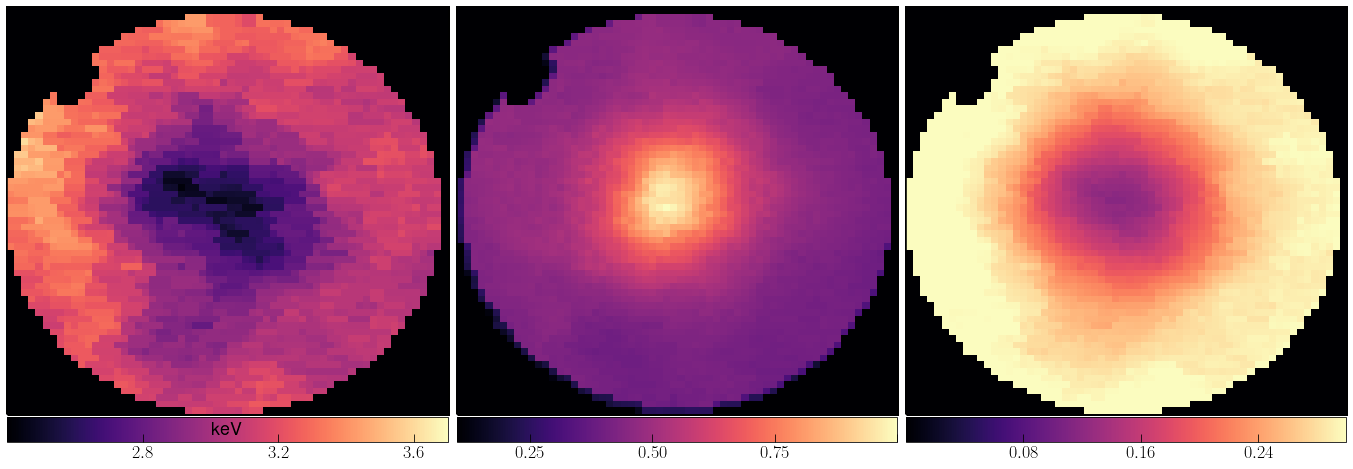

In [36]:
#data 
hdus = [tmap_hdu, pmap_hdu, emap_hdu]

#plot specifics
plot_width, plot_height = 8, 8
nrows, ncols = 1, 3
moment_levels = 40
clims=[[2.4, 3.7],  [0.1, 1], [0, 0.3]]
sns_map = cm.Blues_r 
cmaps=[cm.magma, cm.magma, cm.magma]

zooms = [None, None, None] #[ra+ 6e-4, dec, 58 * u.arcsec], [ra+ 6e-4, dec, 20 * u.arcsec], [ra+ 6e-4, dec, 20 * u.arcsec]]

#draw
fig = plt.figure(figsize=(plot_width*ncols, plot_height*nrows))
gs1 = GridSpec(nrows, ncols)
gs1.update(wspace=0.02, hspace=0.03)

axs = []
cbar_labels = [r'keV',  None, None]
color_labels = ['k', 'k', 'k']

for id_subplot in range(3):

    hdu = hdus[id_subplot]
    hdr = hdu.header
    clim = clims[id_subplot]
    cmap = cmaps[id_subplot]
    cb_label = cbar_labels[id_subplot]
    cb_color = color_labels[id_subplot]
    zoom = zooms[id_subplot]

    ax = fig.add_subplot(gs1[0, id_subplot], projection=WCS(hdr))
    
    ax, cb = pf.ax_fits_map(hdu, vmin=clim[0], vmax=clim[1], cmap=cmap, 
                    coords=zoom, ax=ax, contour=False, 
                    nlevels=moment_levels, lw=5, location='bottom',
                    cb_width=6, units=cb_label, cb_pad=-40,
                    cb_color=cb_color, cb_fsize=18)
                    

    pf.hide_plot_labels(ax, hdr, hidex=1, hidey=1)
    #ax.axis('off')
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('3') 

    axs.append(ax)
